<div style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:center;
                 font-family: Trebuchet MS;">Netflix Movies and TV Shows
    </h1>
</div>

<div align="center"> 
    <img src="https://content.api.news/v3/images/bin/3fcf3cdcc2cfd6905e582a186e46e584" alt="Netflix" width="75%" style="margin-top:2rem;margin-bottom:2rem">
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.</p>
    </div>
</body>

<div style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>

* [<span style="font-family: Trebuchet MS; font-size:15px;">1. Imports</span>](#imports)
* [<span style="font-family: Trebuchet MS; font-size:15px;">2. Loading the Dataset</span>](#loading-the-dataset)
* [<span style="font-family: Trebuchet MS; font-size:15px;">3. Understanding the Data</span>](#understanding-the-data)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">3.1 Checking Null Values</span>](#checking-null-values)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">3.2 Optimizing the Dataset</span>](#optimizing-the-dataset)
* [<span style="font-family: Trebuchet MS; font-size:15px;">4. Exploratory Data Analysis</span>](#exploratory-data-analysis)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1 Univariate Analysis</span>](#univariate-analysis)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1.1 Type</span>](#univariate-analysis-type)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1.2 Duration</span>](#univariate-analysis-duration)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1.3 Release Year</span>](#univariate-analysis-release-year)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1.4 Rating</span>](#univariate-analysis-rating)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1.5 Country</span>](#univariate-analysis-country)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">4.2 Multivariate Analysis</span>](#multivariate-analysis)

<div id="imports"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1. Imports
    </h2>
</div>

In [1]:
%%capture
!pip install kaleido
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
from pprint import pprint
import kaleido
import warnings
from tqdm import tqdm
from tqdm import trange
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")

# disable auto sort behavior in pprint
pprint.sorted = lambda x, key=None: x

In [2]:
# for github 
import plotly.io as pio
#pio.templates.default = pio.templates["plotly_dark"]
pio.renderers.default = "svg"
pio.renderers["svg"].width = 1300

<div id="loading-the-dataset"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">2. Loading the Dataset
    </h2>
</div>

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sahinozan/Netflix-Movies-TV-Shows/main/netflix_titles.csv", encoding="utf-8")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div id="understanding-the-data"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3. Understanding the Data
    </h2>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p style="font-family:verdana;">Dataset consists of 12 features.</p>
        <ol>
            <li style="font-family:verdana;"><b>show_id</b>: The unique id number of each show or movie
                <ul>
                    <li style="font-family:verdana;">s1</li>
                    <li style="font-family:verdana;">s2</li>
                    <li style="font-family:verdana;">s3</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>type</b>: Type of the content
                <ul>
                    <li style="font-family:verdana;">Movie</li>
                    <li style="font-family:verdana;">TV Show</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>title</b>: Title of the content
                <ul>
                    <li style="font-family:verdana;">The Starling</li>
                    <li style="font-family:verdana;">Squid Game</li>
                    <li style="font-family:verdana;">Jaws: The Revenge</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>director</b>: Name of the director for that movie or show
                <ul>
                    <li style="font-family:verdana;">Steven Spielberg</li>
                    <li style="font-family:verdana;">Cédric Jimenez</li>
                    <li style="font-family:verdana;">Hirotsugu Kawasaki</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>cast</b>: Names of the cast for that movie or show
                <ul>
                    <li style="font-family:verdana;">Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane...</li>
                    <li style="font-family:verdana;">Antti Pääkkönen, Heljä Heikkinen, Lynne Guaglione, Pasi Ruohonen, Rauno Ahonen...</li>
                    <li style="font-family:verdana;">Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović...</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>country</b>: Countries of origin for that movie or show
                <ul>
                    <li style="font-family:verdana;">United States, South Africa, India...</li>
                    <li style="font-family:verdana;">United States, United Kingdom, Canada, Germany...</li>
                    <li style="font-family:verdana;">Canada, France, Japan, Russia...</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>date_added</b>: The date the content was added
                <ul>
                    <li style="font-family:verdana;">September 25, 2021</li>
                    <li style="font-family:verdana;">September 22, 2021</li>
                    <li style="font-family:verdana;">August 23, 2021</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>release_year</b>: Release year of the content
                <ul>
                    <li style="font-family:verdana;">2020</li>
                    <li style="font-family:verdana;">2014</li>
                    <li style="font-family:verdana;">2006</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>rating</b>: Motion picture content rating
                <ul>
                    <li style="font-family:verdana;">PG-13</li>
                    <li style="font-family:verdana;">TV-14</li>
                    <li style="font-family:verdana;">R</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>duration</b>: Total duration of the content
                <ul>
                    <li style="font-family:verdana;">90 min</li>
                    <li style="font-family:verdana;">2 seasons</li>
                    <li style="font-family:verdana;">48 min</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>listed_in</b>: List of categories where content is listed
                <ul>
                    <li style="font-family:verdana;">Documentaries, International TV Shows, TV Dramas, TV Mysteries...</li>
                    <li style="font-family:verdana;">Comedies, Dramas, International Movies...</li>
                    <li style="font-family:verdana;">Documentaries, TV Dramas, Comedies...</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
            <li style="font-family:verdana;"><b>description</b>: Short description about the content
                <ul>
                    <li style="font-family:verdana;">As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable</li>
                    <li style="font-family:verdana;">After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth</li>
                    <li style="font-family:verdana;">Tayo speeds into an adventure when his friends get kidnapped by evil magicians invading their city in search of a magical gemstone</li>
                    <li style="font-family:verdana;">...</li>
                </ul>
            </li>
        </ol>
    </div>
</body>

<div id="checking-null-values"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.1 Checking Null Values
    </h3>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Let's first check if there are any null values in the dataset.</p>
    </div>
</body>

In [4]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Let's first check if there are any null values in the dataset.</p>
        <ul>
            <li style="font-family:verdana;">There are small amount of null values in the <b>date_added</b>, <b>rating</b>, <b>duration</b> columns.</li>
            <li style="font-family:verdana;">Meanwhile, there are large amount of null values in the <b>country</b>, <b>cast</b>, <b>director</b> columns.</li>
        </ul>
    </div>
</body>

<div id="optimizing-the-dataset"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.2 Optimizing the Dataset
    </h3>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-radius: 10px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Many of the features are <b>object</b> type. We can convert those features into more specific and compact types to save memory and increase efficiency.</p>
    </div>
</body>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Let's first check the number of unique values for each feature to make the conversion process easier..</p>
    </div>
</body>

In [6]:
number_of_unique_values = {}

for i in df.columns:
    number_of_unique_values[i] = df[i].nunique()
    
number_of_unique_values = {k:v for k,v in sorted(number_of_unique_values.items(), 
                                                 key=lambda x: x[1],
                                                 reverse=True)}

unique_values_df = pd.DataFrame.from_dict(data=number_of_unique_values, 
                                          orient="index", 
                                          columns=["count"]).T
unique_values_df 

,show_id,title,description,cast,director,date_added,country,listed_in,duration,release_year,rating,type
count,8807,8807,8775,7692,4528,1767,748,514,220,74,17,2


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Some of the columns contain less unique values. These will be the ones that we do conversion on them. Columns that contain less unique values:</p>
        <ul>
            <li><b>type</b></li>
            <li><b>release_year</b></li>
            <li><b>rating</b></li>
        </ul>         
        <p style="font-family:verdana;">Other interesting features are <b>show_id</b>, <b>title</b>, and <b>description</b>. They contain unique values for each row. I will check them first to see what is going.</p>
    </div>
</body>



In [7]:
print(f'Number of unique values: {df["show_id"].nunique()}')
print(df["show_id"].unique())

Number of unique values: 8807
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There is a unique value for each show. I don't understand the point of this feature. It only contains the values starting from 1 to 8807 which is basically an index for every row. The problem is that we already have that information stored in our dataframe so, I will remove this feature because it doesn't contain any valuable information for the analysis.</p>
    </div>
</body>

In [8]:
df.drop(labels="show_id", axis=1, inplace=True)

In [9]:
print(f'Number of unique values: {df["title"].nunique()}')
print(df["title"].unique())

Number of unique values: 8807
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Similar to <b>show_id</b>, this column also contains unique values for each show but the difference is that these values are not just integers like an index value. These values contain the name of the each show which is probably will be used in the analysis. Therefore, I will not remove this feature.</p>
    </div>
</body>

In [10]:
print(f'Number of unique values: {df["description"].nunique()}')
print(df["description"].unique())

Number of unique values: 8775
['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'
 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'
 'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'
 ...
 'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.'
 'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.'
 "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."]


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Similar to <b>title</b>, this column also contains unique values for each show. These values contain the short description of the each show which we may use it in the analysis. Therefore, I will not remove this feature.</p>
    </div>
</body>

In [11]:
print(f'Number of unique values: {df["type"].nunique()}')
print(df["type"].unique())

Number of unique values: 2
['Movie' 'TV Show']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are only two unique values in the <b>type</b> column. These are essentially used to categorize the content into <b>Movie</b> or <b>TV-Show</b>. I will convert this feature into <b>category</b> type.</p>
    </div>
</body>

In [12]:
df["type"] = df["type"].astype("category")

In [13]:
print(f'Number of unique values: {df["release_year"].nunique()}')
print(df["release_year"].unique())

Number of unique values: 74
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are 74 unique values in the <b>release_year</b> column. I will convert this feature into <b>category</b> type.</p>
    </div>
</body>

In [14]:
df["release_year"] = df["release_year"].astype("category")

In [15]:
print(f'Number of unique values: {df["rating"].nunique()}')
print(df["rating"].unique())

Number of unique values: 17
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are 17 unique values in the <b>rating</b> column. These values contain both integers and strings. Therefore, we will convert this column into <b>category</b> type.</p>
    </div>
</body>

In [16]:
df["rating"] = df["rating"].astype("category")

In [17]:
print(f'Number of unique values: {df["duration"].nunique()}')
print(df.loc[:30, "duration"].unique())

Number of unique values: 220
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are 220 unique values in the <b>duration</b> column. Considering there are 8807 rows, there will be a lot of repetition. That's why I will convert it into <b>category</b> type.</p>
    </div>
</body>

In [18]:
df["duration"] = df["duration"].astype("category")

In [19]:
print(f'Number of unique values: {df["director"].nunique()}')
print(df.loc[:20, "director"].unique())

Number of unique values: 4528
['Kirsten Johnson' nan 'Julien Leclercq' 'Mike Flanagan'
 'Robert Cullen, José Luis Ucha' 'Haile Gerima' 'Andy Devonshire'
 'Theodore Melfi' 'Kongkiat Komesiri' 'Christian Schwochow'
 'Bruno Garotti' 'Pedro de Echave García, Pablo Azorín Williams'
 'Adam Salky' 'Olivier Megaton']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are 4528 unique values in the <b>director</b> column. Similar to <b>duration</b> column, there are way too many unique values for the <b>category</b> type. I will not convert it into <b>category</b> type.</p>
    </div>
</body>

In [20]:
print(f'Number of unique values: {df["date_added"].nunique()}')
print(df.loc[:20, "date_added"].unique())

Number of unique values: 1767
['September 25, 2021' 'September 24, 2021' 'September 23, 2021'
 'September 22, 2021']


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">There are 1767 unique values in the <b>date_added</b> columns. We can use <b>datetime64</b> type for this column. This will helps us to sort dates easier.</p>
    </div>
</body>

In [21]:
df["date_added"] = df["date_added"].astype("datetime64")

In [22]:
for i in ["cast", "listed_in", "country"]:
    print(df.loc[:5, i].unique(), "\n")

[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar'
 'Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver'] 

['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romant

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p style="font-family:verdana;">The <b>cast</b>, <b>country</b>, and <b>listed_in</b> columns does contain list of values for each show. We can't do any conversion on this.</p>
        <p style="font-family:verdana;">We're done with the optimization. Let's check the dataframe after the conversion.</p>
    </div>
</body>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   category      
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   category      
 7   rating        8803 non-null   category      
 8   duration      8804 non-null   category      
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 538.0+ KB


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;">
        <ul>
            <li style="font-family:verdana;">Before the optimization, dataset had a memory usage of <b>825.8+ KB</b>.</li>
            <li style="font-family:verdana;">After the optimization, dataset have a memory usage of <b>514.4+ KB</b>.</li>
            <li style="font-family:verdana;">We lowered the memory usage by almost <b>38%</b>.</li>
        </ul>
    </div>
</body>


<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4. Exploratory Data Analysis
    </h2>
</div>

<div id="univariate-analysis"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1 Univariate Analysis
    </h3>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">So far, we learned that some of the features have unique values for each row. That's why there is no point of analyzing them individually. For this part, we will only analyze the <b>country</b>, <b>type</b>, <b>duration</b>, <b>release_year</b>, <b>listed_in</b>, and <b>rating</b> features.</p>
    </div>
</body>

In [24]:
unique_values_df

,show_id,title,description,cast,director,date_added,country,listed_in,duration,release_year,rating,type
count,8807,8807,8775,7692,4528,1767,748,514,220,74,17,2


<div id="univariate-analysis-type"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.1 Type
    </h3>
</div>

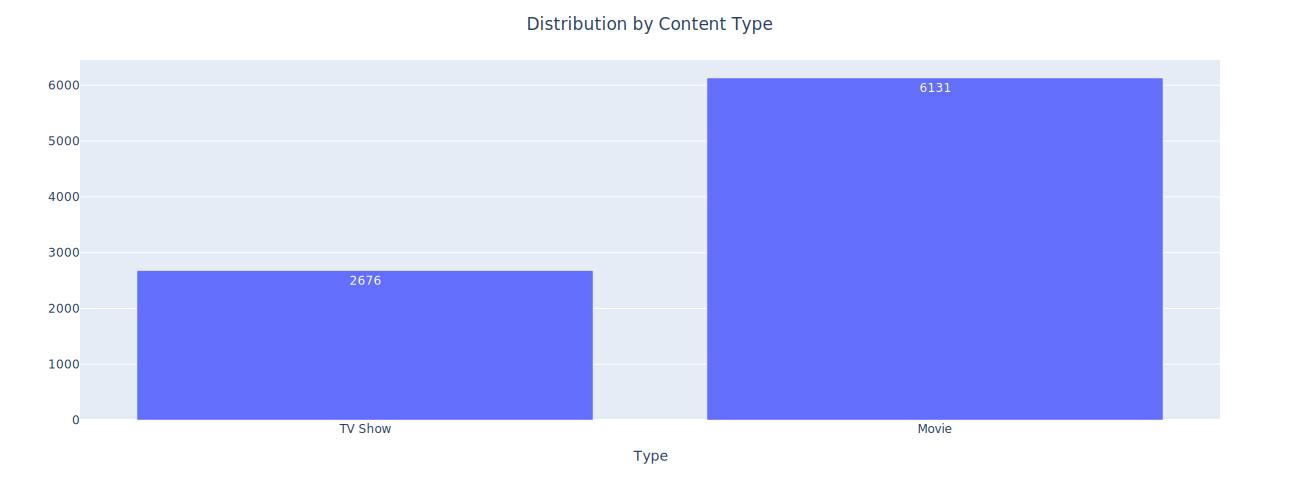

In [25]:
type_count_df = df.value_counts("type").sort_values(ascending=True)

fig = px.bar(data_frame=type_count_df, 
                   x=type_count_df.index,
                   y=type_count_df.values,
                   text_auto=True)

fig.update_layout(xaxis_title="Type", 
                  yaxis_title="", 
                  title="Distribution by Content Type",
                  title_x=0.5)

In [26]:
df["type"].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">There are <b>6131 Movies</b>, approximately <b>70%</b> of the dataset.</p></li>
            <li><p style="font-family:verdana;">There are <b>2676 TV Shows</b>, approximately <b>30%</b> of the dataset.</p></li>
        </ul>
    </div>
</body>

<div id="univariate-analysis-duration"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.2 Duration
    </h3>
</div>

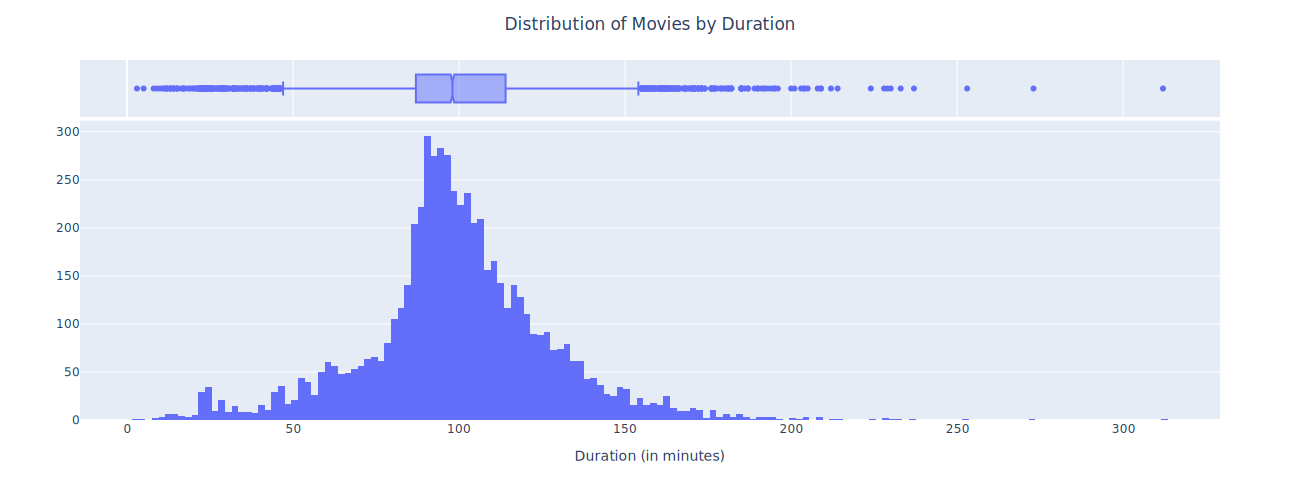

In [27]:
only_movies_df = df[df["type"] == "Movie"]
only_movies_df["duration_in_min"] = only_movies_df["duration"].apply(lambda x: int(x.split()[0]))
only_movies_df = only_movies_df.sort_values(by="duration")

fig = px.histogram(data_frame=only_movies_df, 
                   x="duration_in_min",
                   hover_data=only_movies_df.columns,
                   marginal="box")

fig.update_layout(xaxis_title="Duration (in minutes)", 
                  yaxis_title="", 
                  title="Distribution of Movies by Duration",
                  title_x=0.5)

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">Average duration of a movie in Netflix is <b>98</b> minutes</p></li>
            <li><p style="font-family:verdana;">The majority of the films run around <b>87</b> to <b>114</b> minutes.</p></li>
            <li><p style="font-family:verdana;">The longest film is <b>312</b> minutes long.</p></li>
            <li><p style="font-family:verdana;">The shortest film is <b>3</b> minutes long.</p></li>
        </ul>
    </div>
</body>

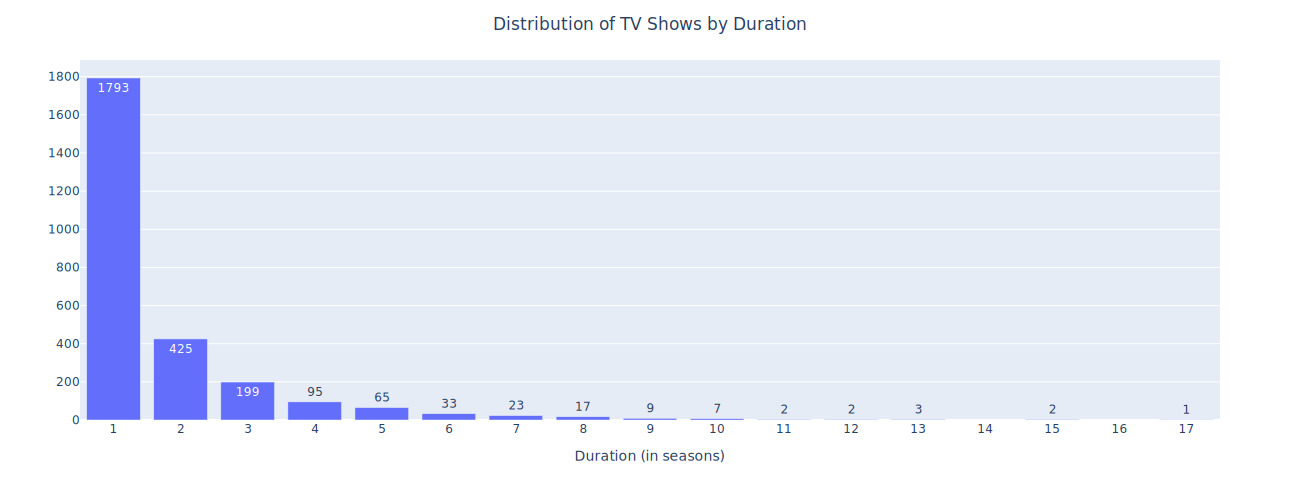

In [28]:
only_tv_shows_df = df[df["type"] == "TV Show"]
only_tv_shows_df["season_count"] = only_tv_shows_df["duration"].apply(lambda x: int(x.split()[0]))
only_tv_shows = only_tv_shows_df.value_counts("season_count").sort_values(ascending=True)

fig = px.bar(data_frame=only_tv_shows, 
                   x=only_tv_shows.index,
                   y=only_tv_shows.values,
                   text_auto=True)

fig.update_layout(xaxis_title="Duration (in seasons)", 
                  yaxis_title="",
                  title="Distribution of TV Shows by Duration",
                  title_x=0.5,
                  bargap=0.2)

fig.update_xaxes(tickmode="linear")

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">The majority of the shows run around <b>1</b> season.</p></li>
            <li><p style="font-family:verdana;">There are also <b>425</b> shows that run around <b>2</b> seasons.</p></li>
            <li><p style="font-family:verdana;">Only a small percentage of shows have more than <b>8</b> seasons.</p></li>
            <li><p style="font-family:verdana;">The longest show is <b>17</b> seasons long.</p></li>
            <li><p style="font-family:verdana;">The shortest show is <b>1</b> season long.</p></li>
        </ul>
    </div>
</body>

<div id="univariate-analysis-release-year"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.3 Release Year
    </h3>
</div>

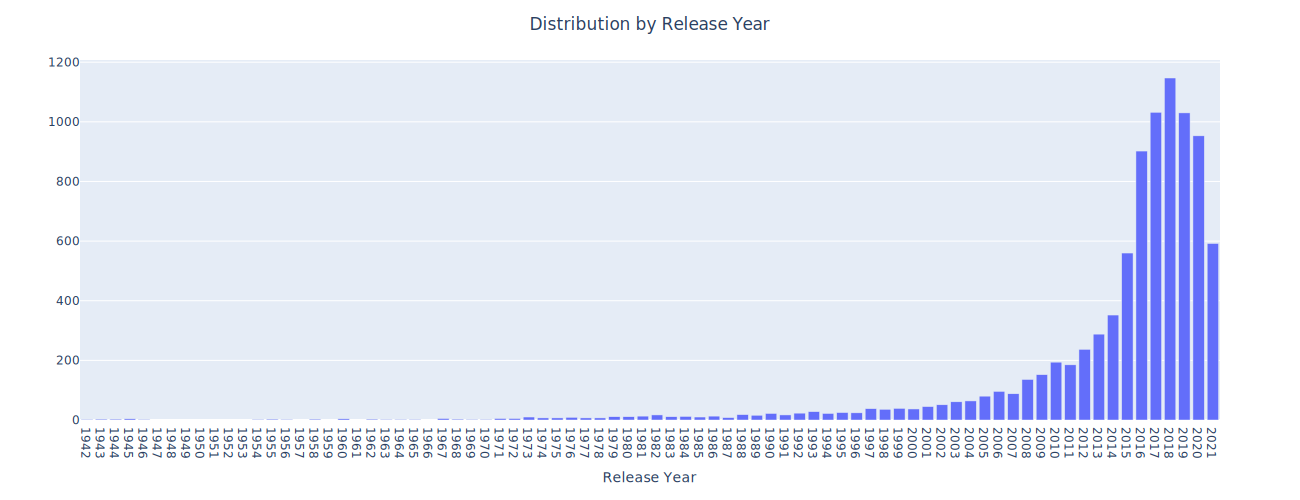

In [29]:
release_year_count_df = df.value_counts("release_year").sort_values(ascending=True)
release_year_count_df = release_year_count_df[release_year_count_df.values > 1]

fig = px.bar(data_frame=release_year_count_df, 
                   x=release_year_count_df.index,
                   y=release_year_count_df.values)

fig.update_layout(xaxis_title="Release Year", 
                  yaxis_title="", 
                  title="Distribution by Release Year",
                  title_x=0.5)
fig.update_xaxes(tickmode='linear')

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">Most of the content on Netflix was released between <b>2015</b> and <b>2021</b>.</p></li>
            <li><p style="font-family:verdana;">There is not much content that was released before <b>1997</b>.</p></li>
            <li><p style="font-family:verdana;">Movies from <b>2018</b> have the <b>highest</b> population in the Netflix library.</p></li>
        </ul>
    </div>
</body>

<div id="univariate-analysis-rating"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.4 Rating
    </h3>
</div>

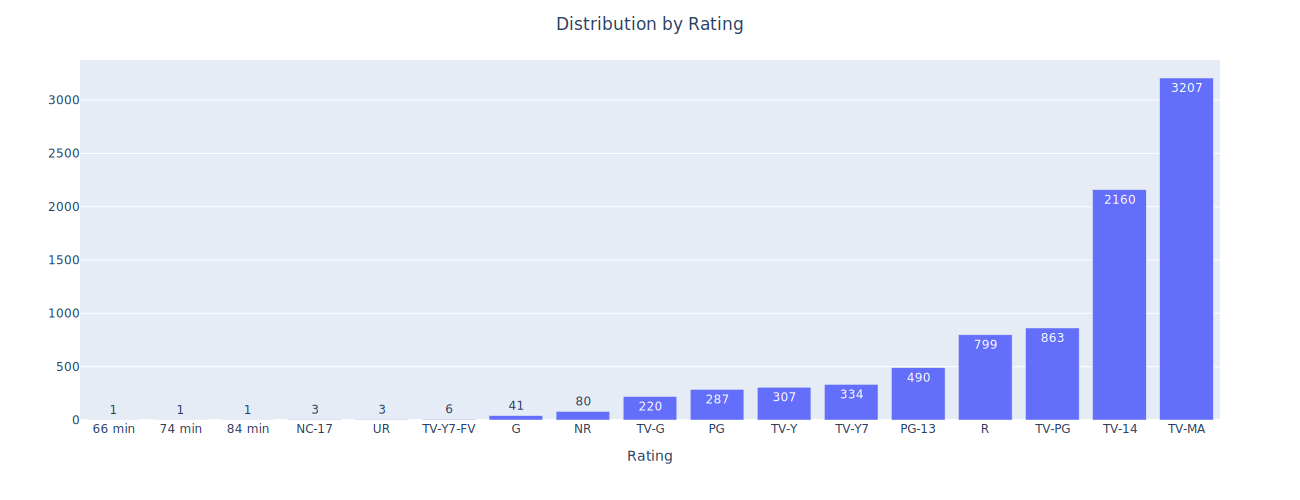

In [30]:
rating_count_df = df["rating"].value_counts().sort_values(ascending=True)

fig = px.bar(data_frame=rating_count_df,
       x=rating_count_df.index,
       y=rating_count_df.values,
       text_auto=True)

fig.update_layout(xaxis_title="Rating", 
                  yaxis_title="", 
                  title="Distribution by Rating",
                  title_x=0.5)

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">The most common rating is <b>TV-MA</b>, with <b>3207</b> titles.</p></li>
            <li><p style="font-family:verdana;"><b>TV-14</b> is second most common rating with over <b>2160</b> titles.</p></li>
            <li><p style="font-family:verdana;">Each of the <b>PG-13</b>, <b>TV-PG</b>, and <b>R</b> ratings has around <b>500</b> movies.</p></li>
            <li><p style="font-family:verdana;">Some ratings, such as <b>UR</b>, <b>TV-Y7-FV</b>, and <b>NC-17</b>, have no titles at all.</p></li>
        </ul>
    </div>
</body>

<div id="univariate-analysis-country"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.5 Country
    </h3>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Even though the <b>countries of origin</b> data given as a list for many content, I will combine those into a single list and analyze them.</p>
    </div>
</body>

In [31]:
total_countries_list = []
countries_count_dict = {}

for lab, row in df.iterrows():
    if type(row["country"]) is not float:
        total_countries_list.extend(row["country"].split(", "))
        
for i in total_countries_list:
    if i not in countries_count_dict.keys():
        countries_count_dict[i] = 1
    else:
        countries_count_dict[i] += 1

del countries_count_dict[""]
country_count_df = pd.DataFrame(data=countries_count_dict, 
                                index=["count"]).T.sort_values(by="count",
                                                               ascending=False)

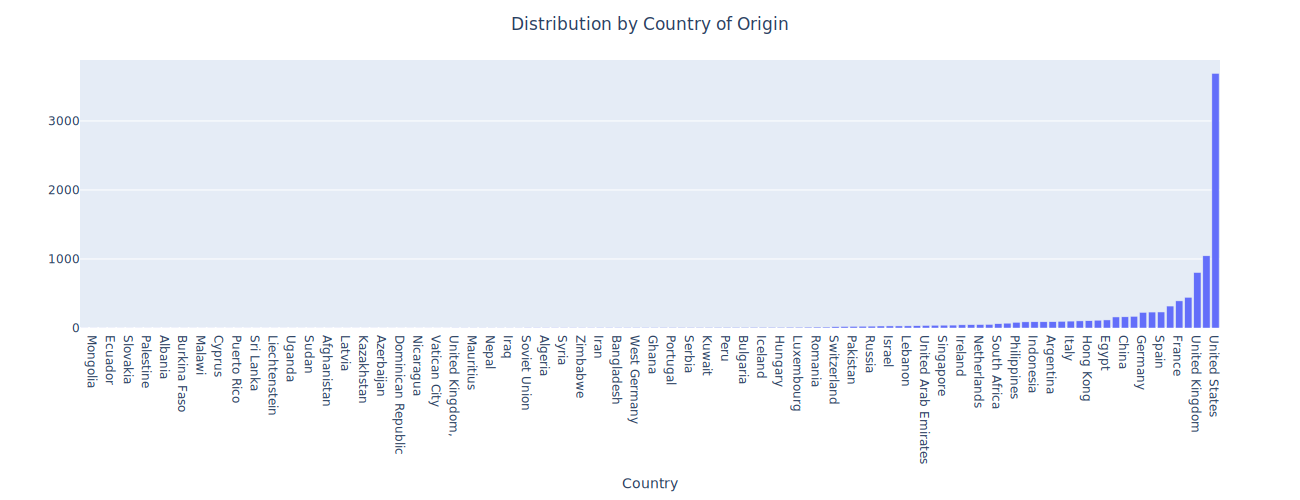

In [32]:
fig = px.bar(data_frame=country_count_df, 
                   x=country_count_df.index,
                   y="count")
fig.update_layout(xaxis_title="Country", 
                  yaxis_title="", 
                  title="Distribution by Country of Origin",
                  xaxis=dict(autorange="reversed"),
                  title_x=0.5)

In [33]:
country_count_df.T["United States"] / len(df)

count    0.418871
Name: United States, dtype: float64

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;">The most popular country for movie production is the <b>United States</b>, by far, with approximately <b>41.8%</b> of the whole Netflix library.</p></li>
            <li><p style="font-family:verdana;"><b>India</b>, the <b>United Kingdom</b>, <b>Canada</b>, <b>France,</b> and <b>Japan</b> are other popular countries for movie production.</p></li>
            <li><p style="font-family:verdana;">It seems that most countries are not used for movie production at all.</p></li>
        </ul>
    </div>
</body>

<div id="univariate-analysis-country"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1.6 Listed In
    </h3>
</div>

<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <p style="font-family:verdana;">Similar to <b>countries</b>, this column also contains listed categories as a list for many content, I will combine those into a single list and analyze them.</p>
    </div>
</body>

In [34]:
total_categories_list = []
category_count_dict = {}

for lab, row in df.iterrows():
    if type(row["listed_in"]) is not float:
        total_categories_list.extend(row["listed_in"].split(", "))
        
for i in total_categories_list:
    if i not in category_count_dict.keys():
        category_count_dict[i] = 1
    else:
        category_count_dict[i] += 1

category_count_df = pd.DataFrame(data=category_count_dict, 
                                index=["count"]).T.sort_values(by="count",
                                                               ascending=False)

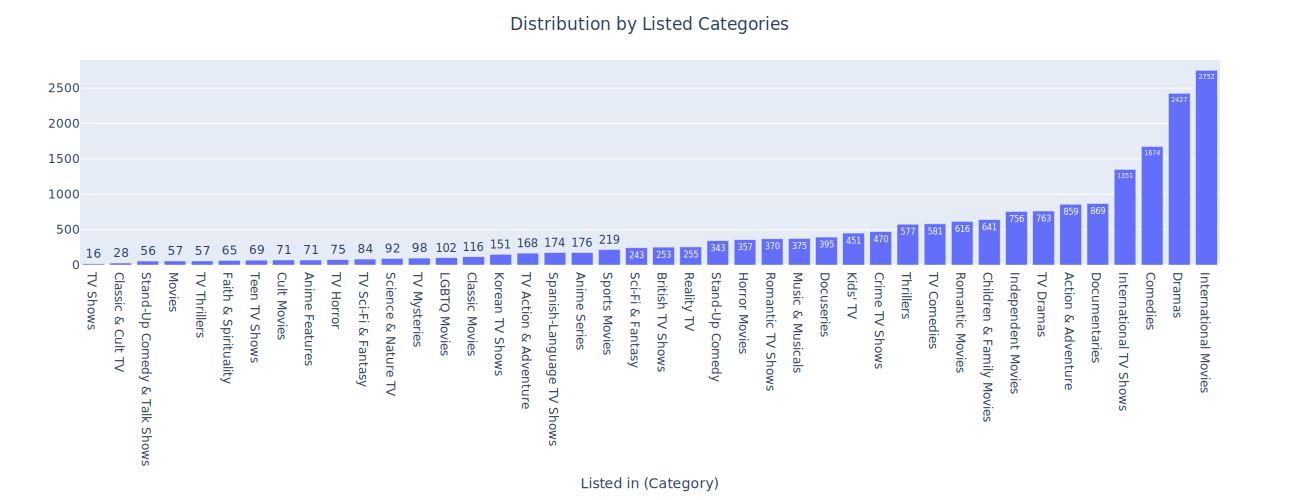

In [35]:
fig = px.bar(data_frame=category_count_df, 
                   x=category_count_df.index,
                   text_auto=True,
                   y="count")
fig.update_layout(xaxis_title="Listed in (Category)", 
                  yaxis_title="",
                  title="Distribution by Listed Categories",
                  xaxis=dict(autorange="reversed"),
                  title_x=0.5)
fig.update_traces(textangle=0)

In [36]:
print(category_count_df.T["International Movies"] / len(df))
print(category_count_df.T["Dramas"] / len(df))

count    0.312479
Name: International Movies, dtype: float64
count    0.275576
Name: Dramas, dtype: float64


<body>
    <div style="background-color: #FF6A74;
                border: 2px solid;
                border-radius: 10px;
                padding-top: 10px;
                padding-bottom: 10px;
                padding-right: 20px;
                padding-left: 20px;
                border-color: #FF1100;"> 
        <p></p>
        <ul>
            <li><p style="font-family:verdana;"><b>International Movies</b> is the most popular category, accounting for over <b>31.2%</b> of the entire Netflix collection.</p></li>
            <li><p style="font-family:verdana;"><b>Dramas</b> is the second most popular category on Netflix, accounting for about <b>27.6%</b> of the entire collection.</p></li>
            <li><p style="font-family:verdana;"><b>Comedies</b> and <b>International TV Shows</b> are also popular categories.</p></li>
            <li><p style="font-family:verdana;">Least popular categories are <b>TV Shows</b>, <b>Classic/Cult TV</b>, <b>Stand-Up/Talk Shows</b>, and <b>Movies</b>.</p></li>
        </ul>
    </div>
</body>

<div id="multivariate-analysis"
     style = "display: fill;
              border-radius: 10px;
              background-color: #E50914;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.2 Multivariate Analysis
    </h3>
</div>